# CS541: Applied Machine Learning, Spring 2025, Lab 3

Lab 3 is an exercise that explores Multiclassification. In the real world multi-classification is a common problem that occurs ranging from the sentiment of a sentence or classifying what animal and image is.

We will be working with [multi-class SVMs](https://scikit-learn.org/stable/modules/multiclass.html), namely:
  * One-vs-all
  * One-vs-One

Additionally we will be working with Decision trees and seeing how they operate.

**Lab Grading**

Labs are hands-on exercises designed to provide guided experience in key concepts through this class.  You are graded based on in-lab participation (not correctness), and **are required to submit** your lab work after class, before Friday of that week.  *Make sure you fill out the attendence form before leaving class*.

For students who miss a lab, you can submit a make-up lab on gradescope by the Friday directly following the lab for partial credit.  Please see the syllabus for the lab grading policy.

# Regularization example

In [1]:
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
import numpy as np

In [2]:
iris = datasets.load_iris()

In [3]:
iris.data.shape

(150, 4)

In [4]:
X = iris.data[:, :2]
y = iris.target
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=101)


In [5]:
print(X.shape)
print(np.unique(y_test))

(150, 2)
[0 1 2]


In [6]:
# C is the regularization parameter. The strength of regularization is inversely proportional to C.
# In this exercise, we will try different values of C and observe whether it causes the model to overfit.
# C = 0.1 → High Regularization (Simpler Model, Larger Margin, Less Overfitting)
# C = 10 → Low Regularization (More Complex Model, Smaller Margin, Higher Overfitting)

rbf = svm.SVC(kernel='rbf', C=0.1).fit(X_train, y_train)
rbf_c1 = svm.SVC(kernel='rbf', C=1).fit(X_train, y_train)
rbf_c10 = svm.SVC(kernel='rbf', C=10).fit(X_train, y_train)


In [7]:
rbf_pred = rbf.predict(X_test)
rbf_c1_pred = rbf_c1.predict(X_test)
rbf_c10_pred = rbf_c10.predict(X_test)

In [8]:
print(np.unique(rbf_pred))
print(np.unique(rbf_c1_pred))
print(np.unique(rbf_c10_pred))

[0 1 2]
[0 1 2]
[0 1 2]


In [9]:
rbf_accuracy = accuracy_score(y_test, rbf_pred)
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

Accuracy (RBF Kernel):  76.67
F1 (RBF Kernel):  75.68


In [10]:
rbf_c1_accuracy = accuracy_score(y_test, rbf_c1_pred)
rbf_c1_f1 = f1_score(y_test, rbf_c1_pred, average='weighted')
print('Accuracy (RBF Kernel, C=1.0): ', "%.2f" % (rbf_c1_accuracy * 100))
print('F1 Score (RBF Kernel, C=1.0): ', "%.2f" % (rbf_c1_f1 * 100))

Accuracy (RBF Kernel, C=1.0):  73.33
F1 Score (RBF Kernel, C=1.0):  72.45


In [11]:
rbf_c10_accuracy = accuracy_score(y_test, rbf_c10_pred)
rbf_c10_f1 = f1_score(y_test, rbf_c10_pred, average='weighted')
print('Accuracy (RBF Kernel, C=10.0): ', "%.2f" % (rbf_c10_accuracy * 100))
print('F1 Score (RBF Kernel, C=10.0): ', "%.2f" % (rbf_c10_f1 * 100))

Accuracy (RBF Kernel, C=10.0):  70.00
F1 Score (RBF Kernel, C=10.0):  69.67


## [One-vs-all SVM classifier](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html)

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.datasets import make_blobs

# Plot decision boundaries
def plot_decision_boundaries(X, y, classifier, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap="Accent", alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="Accent", edgecolors='k')



In [13]:
# Generate a synthetic dataset with three classes
X, y = datasets.make_classification(n_samples=300, n_features=2, n_classes=3,
                                     n_clusters_per_class=1, n_redundant=0,
                                     random_state=42)

# X, y = make_blobs(random_state=27)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features (optional, but can help SVM performance)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [15]:
# Create a One-vs-Rest (One-vs-All) SVM classifier
svm_classifier = OneVsRestClassifier(SVC(kernel='linear', probability=True, random_state=42))

# Fit the classifier to the training data
svm_classifier.fit(X_train, y_train)



OneVsRestClassifier(estimator=SVC(kernel='linear', probability=True,
                                  random_state=42))

Accuracy: 88.89%


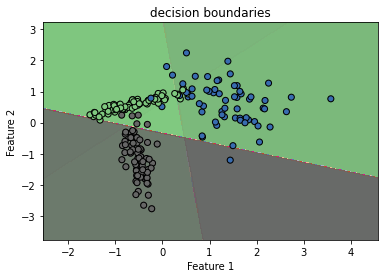

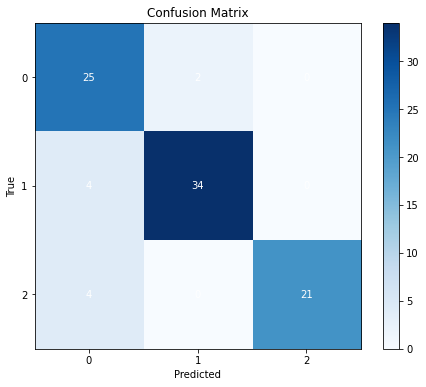

In [16]:
# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot decision boundaries for each class
for i in range(3):
    svm_classifier_i = svm_classifier.estimators_[i]
    plot_decision_boundaries(X_train, y_train, svm_classifier_i, f'Class {i} vs. Rest')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title("decision boundaries")
plt.show()
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(3))
plt.yticks(np.arange(3))
plt.xlabel('Predicted')
plt.ylabel('True')
for i in range(3):
    for j in range(3):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='white')
plt.show()

# Problem 1
You will work on a dataset that has 4 classes

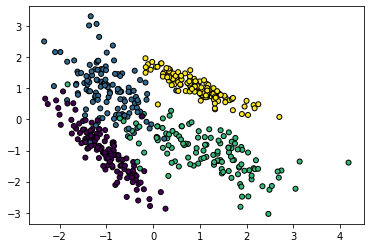

In [17]:
# Generate a synthetic dataset with three classes
X, y = datasets.make_classification(n_samples=500, n_features=2, n_classes=4,
                                     n_clusters_per_class=1, n_redundant=0,
                                     random_state=1)

# X, y = make_blobs(random_state=27)
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor="k")

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features (optional, but can help SVM performance)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [18]:
# Create a One-vs-Rest (One-vs-All) SVM classifier
svm_classifier = OneVsRestClassifier(SVC(kernel='linear', probability=True, random_state=42))

# Fit the classifier to the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 92.67%


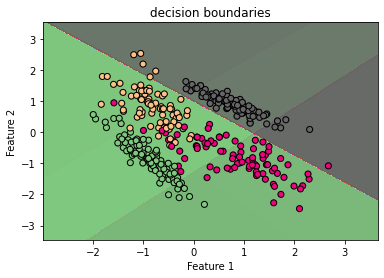

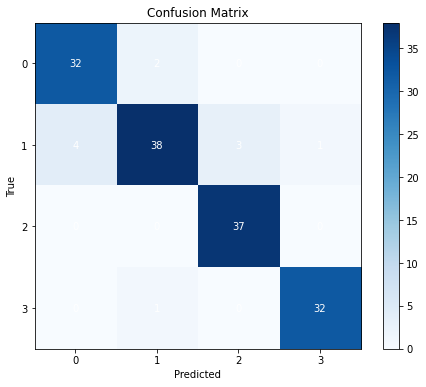

values: [0 1 2 3]
counts: [36 41 40 33]


In [19]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot decision boundaries for each class
for i in range(4):
    svm_classifier_i = svm_classifier.estimators_[i]
    plot_decision_boundaries(X_train, y_train, svm_classifier_i, f'Class {i} vs. Rest')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title("decision boundaries")
plt.show()
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(4))
plt.yticks(np.arange(4))
plt.xlabel('Predicted')
plt.ylabel('True')
for i in range(4):
    for j in range(4):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='white')
plt.show()

values, counts = np.unique(y_pred, return_counts=True)
print('values:', values)
print('counts:', counts)

In [20]:

# Peform cross validation on the SVM classifier with a cv=5
scores = cross_val_score(svm_classifier, X, y, cv=5)
print(scores)

[0.96 0.91 0.93 0.9  0.95]


In [21]:
print(y_test.shape)

(150,)


# Question to make a[ OneVsOne classifier](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsOneClassifier.html) and then do a faces questions


In [23]:
#Import the OneVsOne classifier and initialize it
from sklearn.multiclass import OneVsOneClassifier
svm_classifier = OneVsOneClassifier(SVC(kernel='linear', probability=True, random_state=42))

# Fit the classifier to the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 92.00%


In [24]:
# Peform cross validation on the OneVsOne classifier with a cv=5
scores = cross_val_score(svm_classifier, X, y, cv=5)
print(scores)

[0.95 0.93 0.96 0.95 0.96]


# Problem 1.1
  Now we want to apply OneVsRest to the faces dataset

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


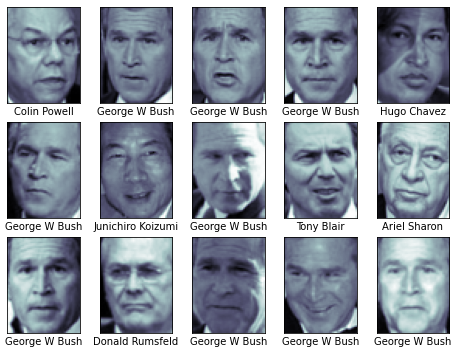

In [25]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

fig, ax = plt.subplots(3, 5, figsize=(8, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [26]:
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

In [27]:
print(np.unique(ytrain))
print(np.unique(ytest))

[0 1 2 3 4 5 6 7]
[0 1 2 3 4 5 6 7]


In [29]:
#Import the OneVsRest classifier and initialize it
svm_classifier = OneVsRestClassifier(SVC(kernel='linear', probability=True, random_state=42))


# Fit the classifier to the training data
svm_classifier.fit(Xtrain, ytrain)

# Make predictions on the train data
y_pred = svm_classifier.predict(Xtrain)

# Calculate the accuracy
print("Train accuracy:",metrics.accuracy_score(ytrain, y_pred))


# Make predictions on the test data
y_pred = svm_classifier.predict(Xtest)

# Calculate the accuracy
print("Test accuracy:",metrics.accuracy_score(ytest, y_pred))

Train accuracy: 1.0
Test accuracy: 0.8011869436201781


In [30]:
print(np.unique(y_pred))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7]
[0 1 2 3]


In [31]:
#Import the OneVsRest classifier
model = OneVsRestClassifier(SVC(kernel='linear', probability=True, random_state=42))

# Peform cross validation on the OneVsRest classifier with a cv=5
scores = cross_val_score(model, X, y, cv=5)

In [32]:
scores

array([0.96, 0.91, 0.93, 0.9 , 0.95])

# Here we will show an example of a Decision Tree

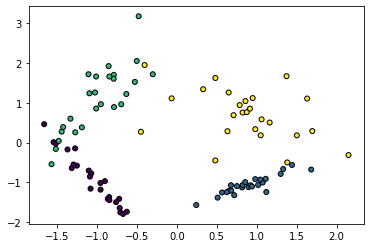

In [33]:
# Generate a synthetic dataset with four classes
X, y = datasets.make_classification(n_samples=100, n_features=2, n_classes=4,
                                     n_clusters_per_class=1, n_redundant=0,
                                     random_state=1)

# X, y = make_blobs(random_state=27)
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor="k")

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features (optional, but can help SVM performance)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [34]:
#from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# Create Decision Tree classifer object
clf = tree.DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [35]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 86.67%


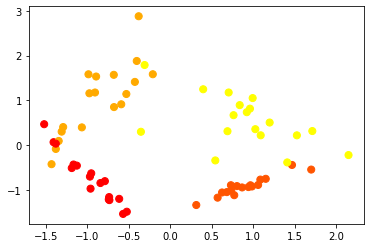

In [36]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='autumn');

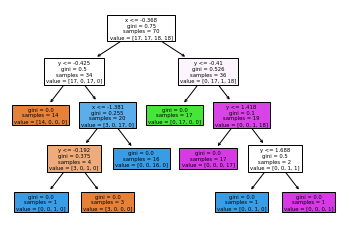

In [37]:
_ = tree.plot_tree(clf,
                   feature_names=list(['x','y',]),filled=True)

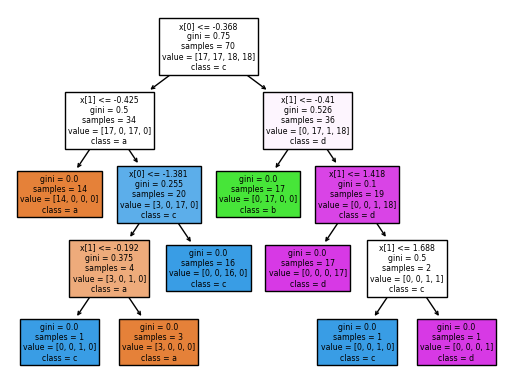

In [ ]:
_ = tree.plot_tree(clf,
                   class_names=list(['a','b','c','d']),
                   filled=True)

# Problem 2
# Next we go about using a Decision tree on the iris dataset

In [38]:
X = iris.data[:, :2]
y = iris.target
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=101)


In [39]:
# Create Decision Tree classifer object
clf = tree.DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [40]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 73.33%


# Problem 2.1
  Now we work on a 4 class dataset

In [41]:
# Generate a synthetic dataset with four classes
X, y = datasets.make_classification(n_samples=500, n_features=2, n_classes=4,
                                     n_clusters_per_class=1, n_redundant=0,
                                     random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features (optional, but can help SVM performance) using the method we described above



In [42]:
# Create Decision Tree classifer object
clf = tree.DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [43]:
# Calculate accuracy
#accuracy =
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 73.33%


In [44]:
from sklearn.model_selection import cross_val_score

# Create Decision Tree classifer object
model = tree.DecisionTreeClassifier()

# Peform cross validation on the Decision Tree Classifier
scores = cross_val_score(model, X, y, cv=5)
print(scores)

[0.92 0.9  0.93 0.91 0.89]


# Problem 2.2
  Now we work on a faces dataset

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


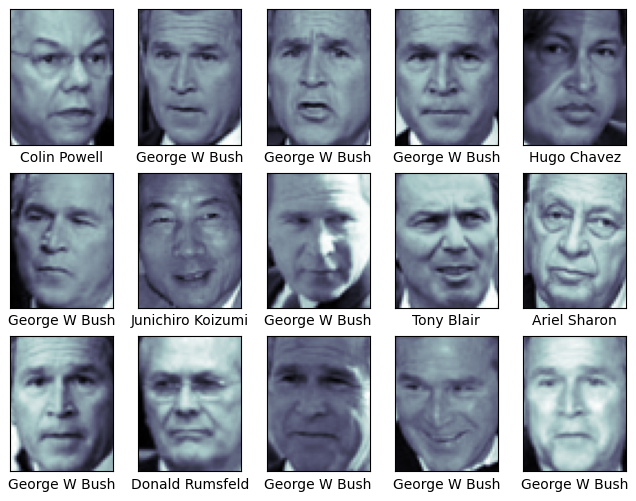

In [62]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

fig, ax = plt.subplots(3, 5, figsize=(8, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [45]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

In [46]:
# Standardize features (optional, but can help SVM performance)

standardizer = StandardScaler()
Xtrain = standardizer.fit_transform(Xtrain)
Xtest = standardizer.transform(Xtest)


In [52]:
# Create Decision Tree classifer object
clf = tree.DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(Xtrain,ytrain)

#Predict the response for test dataset
y_pred = clf.predict(Xtest)

In [53]:
# Calculate accuracy
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 73.33%


In [54]:
#Get the recall score on the test set, we want to use the weighted average
from sklearn.metrics import recall_score
recall = recall_score(ytest, y_pred, average='weighted')
print(f"Recall: {recall * 100:.2f}%")


Recall: 44.81%


In [55]:
#Get the precision score on the test set, we want to use the weighted average
from sklearn.metrics import precision_score
precision = precision_score(ytest, y_pred, average='weighted')
print(f"Precision: {precision * 100:.2f}%")

Precision: 46.76%
